# Assignment 3: Image Processing

### (1)

I uploaded an image from my computer to my Jypyter Notebook home page. Here is the image in a markdown cell:

![](baby_snek.jpg)

### (2)

Now lets write a python code to import the image and export some basic information.

In [1]:
from PIL import Image
bs = Image.open('baby_snek.jpg')
print(bs.size)
print(bs.mode)

The image is opened and we see that it is a 838 pixels wide by 559 pixels high and is in RGB mode. 

### (3)

In order to get a better understanding of edge detection let's try the Image Filter FIND_EDGES

In [2]:
from PIL import ImageFilter
bs2 =bs.filter(ImageFilter.FIND_EDGES)
bs2.show()

Here is the resulting image:


![](baby_snek_FIND_EDGES.png)

### (4)

In oder to reduce noise we will apply a blurring filter.

In [3]:
bs3 = bs.filter(ImageFilter.GaussianBlur(radius=2))
bs3.show()
bs4 = bs.filter(ImageFilter.GaussianBlur(radius=5))
bs4.show()
bs5 = bs.filter(ImageFilter.GaussianBlur(radius=10))
bs5.show()

Here is a Gassian blur rith radius 2 pixels


![](GaussianBlur2.PNG)

And the same filter with radius 5 pixels


![](GaussianBlur5.PNG)

And with radius 10 pixels


![](GaussianBlur10.PNG)

In [4]:
bs6 =bs5.filter(ImageFilter.FIND_EDGES)
bs6.show()

If the image is too blurred FIND_EDGES doesn't detect anything

![](FIND_EDGES_BLUR_10.PNG)

Let's try to make our own Gaussian blurring filter from scratch. Pixels at the edge of the image we will call boundary pixels. They don't have enough surounding pixels to run some calculations. For the blurring step boundary pixels keep thier original values. 

A Gausian filter of the size $(2k+1)^2$ can be defined by the equation:

$$ H_{ij}=\frac{1}{2\pi\sigma^2}e^\left(-\frac{(i-(k+1))^2+(j-(k+1))^2}{2\sigma^2}\right)$$

Where $1\leq i,j \leq (2k+1)$

In [5]:
import numpy as np

def GausKer(size,sig):
    k = int(size) // 2
    x,y = np.mgrid[-k:k+1, -k:k+1]
    gk = (1/(2*np.pi*sig**2))*(np.exp(-((x**2 + y**2) / (2*sig**2))))
    return gk

GausKer(5,10).flatten()


array([0.00152914, 0.00155225, 0.00156003, 0.00155225, 0.00152914,
       0.00155225, 0.00157571, 0.00158361, 0.00157571, 0.00155225,
       0.00156003, 0.00158361, 0.00159155, 0.00158361, 0.00156003,
       0.00155225, 0.00157571, 0.00158361, 0.00157571, 0.00155225,
       0.00152914, 0.00155225, 0.00156003, 0.00155225, 0.00152914])

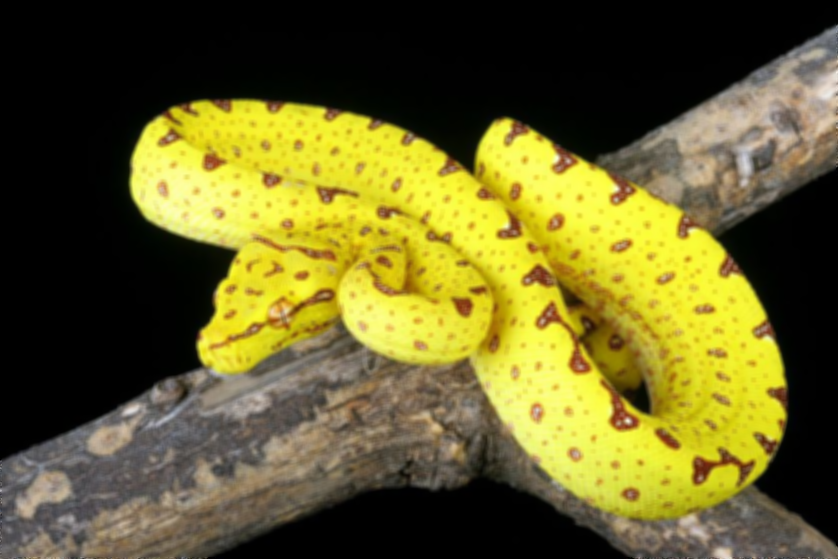

In [6]:
def BlurImg(size,sig,img):
    ker=GausKer(size,sig).flatten()
    img2 = img.filter(ImageFilter.Kernel((size,size), ker))
    return img2

BlurImg(5,10,bs)

### (5)

Now we will make our own edge detection filter. We will use the first derivative of the Gaussian.



In [7]:
bsm= bs.convert('L') 
bsbw= bs.convert('1') 
bsm.show()
bsbw.show()

In [8]:
pixels = list(bsm.getdata())
w,h = bsm.size
pixels = [pixels[i*w:(i+1)*w]for i in range(h)]
print(pixels)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [9]:
pixels = np.asarray(pixels)
print(pixels.shape)

(559, 838)


In [10]:
kern=[[0,-1,0],[-1,4,-1],[0,-1,0]]

In [11]:
from scipy import ndimage
%matplotlib inline
from matplotlib import pyplot as plt

conv=ndimage.convolve(pixels,kern, mode='constant', cval=0.0)
img = Image.fromarray(conv)
img.show()

Here is our resulting image 

![](bbsnek1.png)

Let's see if we can improve it by adding blurs with differnt widths

In [12]:
bs2 = BlurImg(5,2,bs)
bs2m = bs2.convert('L')
pixels2 = list(bs2m.getdata())
w,h = bs2m.size
pixels2 = [pixels2[i*w:(i+1)*w]for i in range(h)]
pixels2 = np.asarray(pixels2)
conv2=ndimage.convolve(pixels2,kern, mode='constant', cval=0.0)
img2 = Image.fromarray(conv2)
img2.show()

Here is our resulting image for $\sigma =$ 2, it is much harder to see and smaller details are smoothed out.

![](bbsnek2.png)

In [13]:
def EdgeMe2D(img):
    pixels2 = list(img.getdata())
    w,h = img.size
    pixels2 = [pixels2[i*w:(i+1)*w]for i in range(h)]
    pixels2 = np.asarray(pixels2)
    conv2=ndimage.convolve(pixels2,kern, mode='constant', cval=0.0)
    img2 = Image.fromarray(conv2)
    img2.show()
    return img2

def EdgeMe3D(img):
    pixels2 = list(img.getdata())
    w,h = img.size
    pixels2 = [pixels2[i*w:(i+1)*w]for i in range(h)]
    pixels2 = np.asarray(pixels2)
    pixels2d= pixels2[:, :, 0]
    conv2=ndimage.convolve(pixels2d,kern, mode='constant', cval=0.0)
    img2 = Image.fromarray(conv2)
    img2.show()
    return img2
    

In [14]:
from PIL import ImageEnhance
def enhancer(img):
    enhancer = ImageEnhance.Contrast(img)
    enhanced_im = enhancer.enhance(4.0)
    enhanced_im.show()
    return enhanced_im

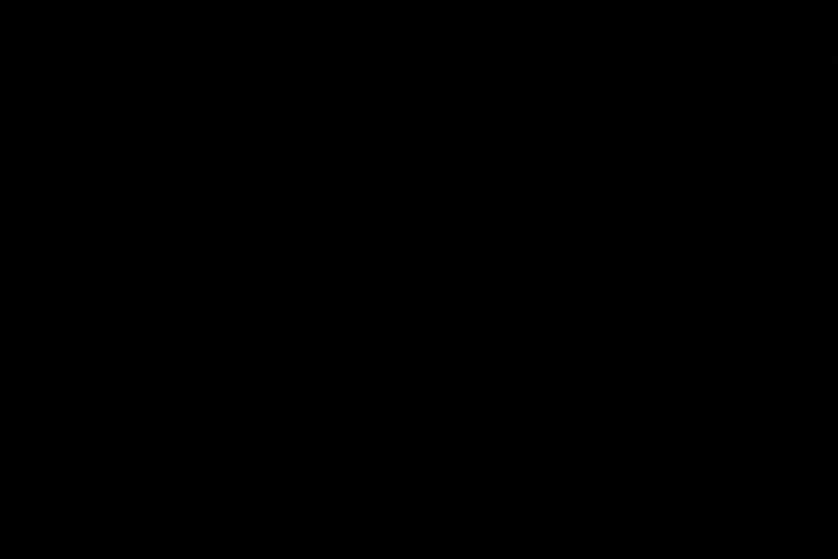

In [15]:
EdgeMe3D(enhancer(bs2))

If we enhance the contrast we can see that increasing the blur gives a nice outline of the snake but most of the detailed patterns are lost.

![](enhancedbbsenk2.png)

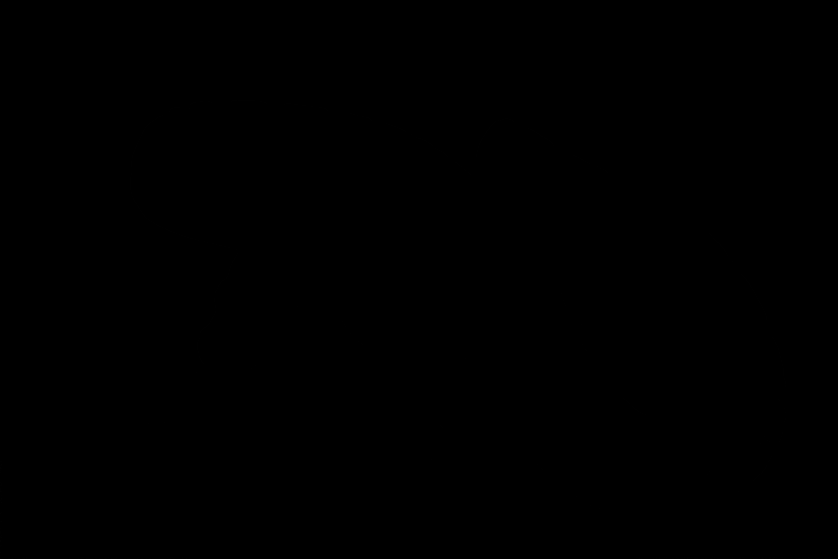

In [16]:
bs100 = BlurImg(5,100,bs)
EdgeMe3D(enhancer(bs100))

We see little difference when increasing $\sigma$ from 2 to 100.

![](bbsnek100.png)

### (6)

Now let's play with different parameters to optimise the system.

We'll start by trying differnt colors.

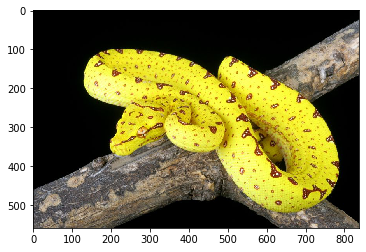

In [17]:
bsbw= bs.convert('1') 
bsm= bs.convert('L') 

%matplotlib inline
from matplotlib import pyplot as plt

plt.imshow(bs)

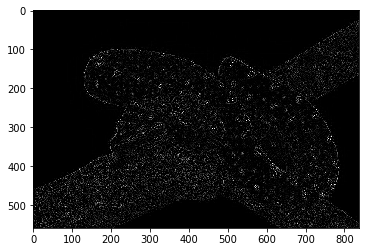

In [18]:
plt.imshow(EdgeMe3D(bs))

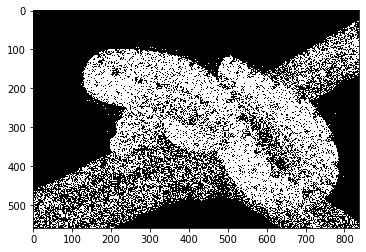

In [19]:
plt.imshow(bsbw)

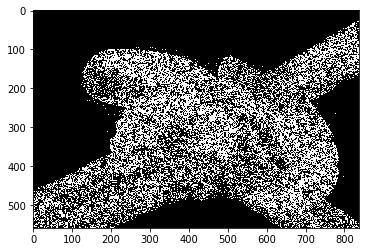

In [27]:
plt.imshow(EdgeMe2D(bsbw))

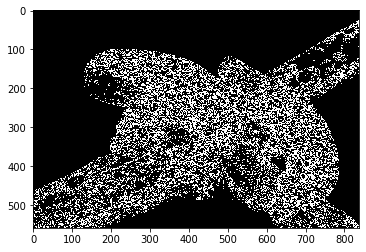

In [28]:
plt.imshow(EdgeMe2D(enhancer(bs).convert('1')))

The black and white image remains faint even when enhanced

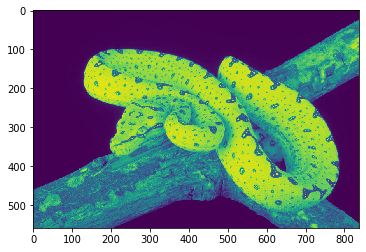

In [22]:
plt.imshow(bsm)

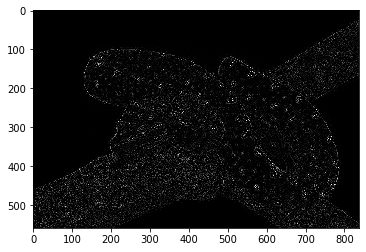

In [23]:
plt.imshow(EdgeMe2D(bsm))

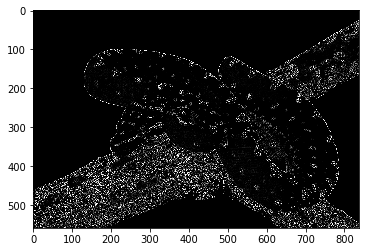

In [24]:
plt.imshow(EdgeMe2D(enhancer(bs).convert('L')))

The clearest image is derived from the RBG mode image.

We can also try changing the stencil we used.

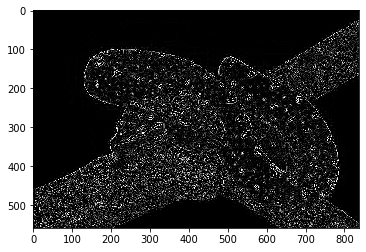

In [25]:
def EdgeMe3DKern2(img):
    pixels2 = list(img.getdata())
    w,h = img.size
    kern=[[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]
    pixels2 = [pixels2[i*w:(i+1)*w]for i in range(h)]
    pixels2 = np.asarray(pixels2)
    pixels2d= pixels2[:, :, 0]
    conv2=ndimage.convolve(pixels2d,kern, mode='constant', cval=0.0)
    img2 = Image.fromarray(conv2)
    img2.show()
    return img2
    
plt.imshow(EdgeMe3DKern2(bs))

lines show up brighter with this stencil, but there is also more noise

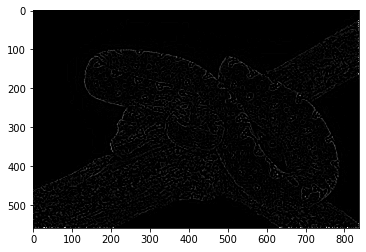

In [26]:
plt.imshow(EdgeMe3DKern2(BlurImg(5,10,bs)))

Although this image is faint, if we look closely we can see that the edge detection is quite good. Small details in the pattern are detected, but there is less noise. Let's see if we can enhance the brightness of the image to make this more clear.

![](BBSNEKBRIGHT.png)

In order to avoid double detections we could add a non maximum supression algorithm. This look at each pixel and checks to see if its neigbors (i, j-1) and (i, j+1) are brighter or dimmer. If a pixel is not a max, it is set to 0. This doe not appear to be a majjor problem for our image. CAPTCHA stands for "completely automated public Turing test to tell computers and humans apart." Th image is distirted in a way such that humans can decode it and type the answer, but computers cannot. for example this image is wavy but we can still easily read "smwm."

![](Captcha.jpg)


I think edge detection would be an important first step in decoding a CAPTCHA image, but the process would be very complex. We dont fully understand how the human brain can recognize letters as the same when they are distorted or in different fonts, so it would be diffucult to program a computer to do so. I think it would have to involve a lot of machine learning. I think edge detction could have a lot of applications for visual artists. They coul use it to identify and select different shapes in an image. 

### (7)

In this assignment we learned about basic image processing by convolving different kernels with a test image. By using a Gaussian kernel we created a blur filter. By using the Laplacian of the Gaussian we created an edge detction filter. This filter finds pixels that change intensity quickly relative to their neighbors. The human eye detects this rapid change as an edge. Edge detection takes a complex image and can turn it into a simple line drawing. this has many applications for image processing. 